Training Data Imported: (120000, 11)
Test Data Imported: (30000, 11)
Training Set Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   personal_credit_%  120000 non-null  float64
 1   age                120000 non-null  int64  
 2   A30-60_Counter     120000 non-null  int64  
 3   expense_ratio      120000 non-null  float64
 4   income             96311 non-null   float64
 5   num_loans          120000 non-null  int64  
 6   A90+_Counter       120000 non-null  int64  
 7   num_home_loans     120000 non-null  int64  
 8   A60-90_Counter     120000 non-null  int64  
 9   num_dependents     116873 non-null  float64
 10  PD_2years          120000 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 10.1 MB
None

Test Set Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (to

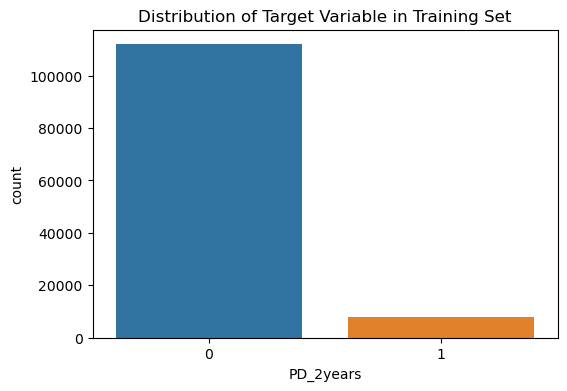

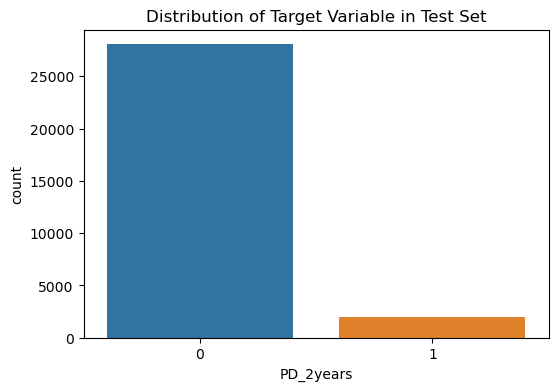


Training Set Correlations:
                    personal_credit_%       age  A30-60_Counter  expense_ratio  \
personal_credit_%           1.000000 -0.004535       -0.001190       0.000774   
age                        -0.004535  1.000000       -0.062556       0.023474   
A30-60_Counter             -0.001190 -0.062556        1.000000      -0.006527   
expense_ratio               0.000774  0.023474       -0.006527       1.000000   
income                      0.006886  0.036021       -0.010250      -0.028270   
num_loans                  -0.011295  0.146868       -0.055334       0.052369   
A90+_Counter               -0.000903 -0.060513        0.983511      -0.008668   
num_home_loans              0.005005  0.030738       -0.030274       0.127897   
A60-90_Counter             -0.001034 -0.056328        0.986981      -0.007928   
num_dependents              0.000360 -0.213670       -0.003841      -0.041805   
PD_2years                  -0.001534 -0.116384        0.126460      -0.008119   

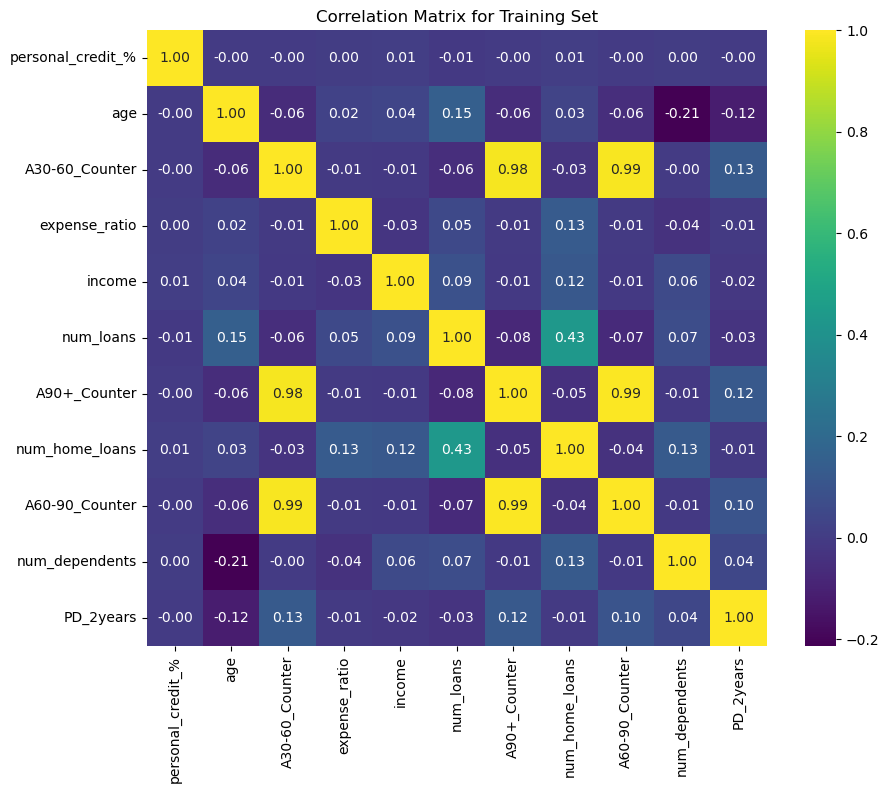


Test Set Correlations:
                    personal_credit_%       age  A30-60_Counter  expense_ratio  \
personal_credit_%           1.000000 -0.011091       -0.001772       0.013809   
age                        -0.011091  1.000000       -0.064738       0.026870   
A30-60_Counter             -0.001772 -0.064738        1.000000      -0.006691   
expense_ratio               0.013809  0.026870       -0.006691       1.000000   
income                      0.009193  0.051318       -0.010599      -0.036126   
num_loans                  -0.011189  0.151081       -0.055238       0.041276   
A90+_Counter               -0.001663 -0.062966        0.983970      -0.007324   
num_home_loans              0.011015  0.042913       -0.031751       0.096415   
A60-90_Counter             -0.001108 -0.060473        0.987106      -0.006374   
num_dependents              0.006301 -0.211826        0.002198      -0.038481   
PD_2years                  -0.002782 -0.111333        0.122056      -0.006011   

  

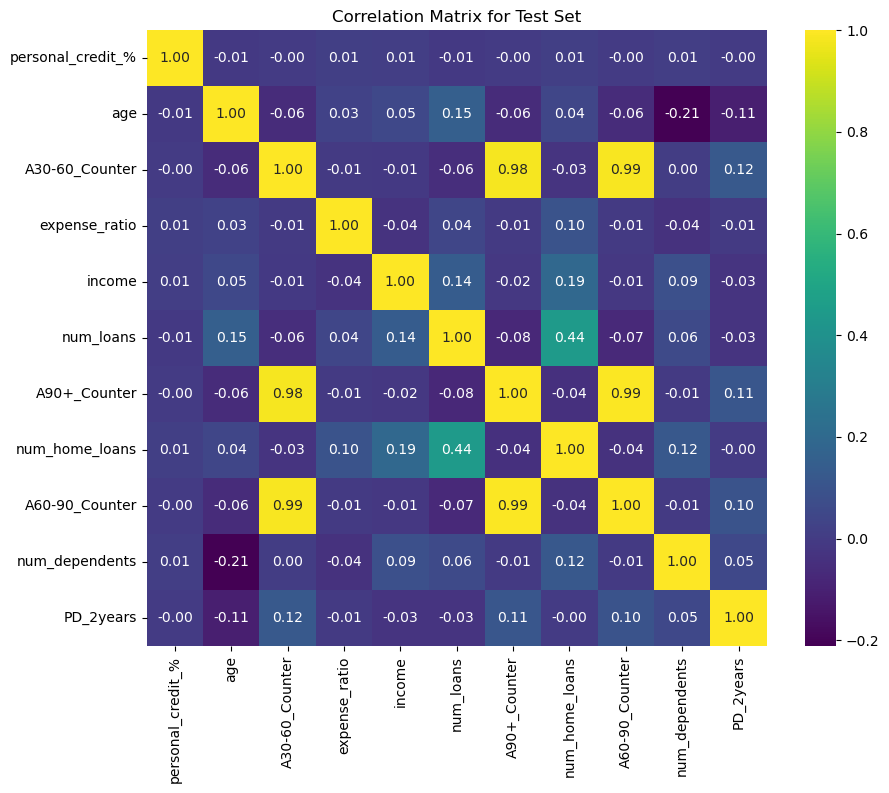

In [9]:
# Exploratory Data Analysis (EDA) for train/test Datasets

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Adjust the paths according to your dataset locations
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Basic info for both datasets
print("Training Data Imported:", train_df.shape)
print("Test Data Imported:", test_df.shape)

print("Training Set Info:")
print(train_df.info())
print("\nTest Set Info:")
print(test_df.info())

# Summary statistics for both datasets
print("\nTraining Set Description:")
print(train_df.describe())
print("\nTest Set Description:")
print(test_df.describe())

# Analyzing imbalance in the target variable for both datasets
print("\nTraining Set Target Variable Distribution:")
print(train_df['PD_2years'].value_counts(normalize=True))

print("\nTest Set Target Variable Distribution:")
print(test_df['PD_2years'].value_counts(normalize=True))

# Visualize the imbalance in the training set
plt.figure(figsize=(6, 4))
sns.countplot(x='PD_2years', data=train_df)
plt.title('Distribution of Target Variable in Training Set')
plt.show()

# Visualize the imbalance in the test set
plt.figure(figsize=(6, 4))
sns.countplot(x='PD_2years', data=test_df)
plt.title('Distribution of Target Variable in Test Set')
plt.show()

# Calculate and display correlations in the training set
print("\nTraining Set Correlations:\n", train_df.corr())

# Correlation with target variable in the training set
plt.figure(figsize=(10, 8))
sns.heatmap(train_df.corr(), annot=True, fmt=".2f", cmap="viridis")
plt.title('Correlation Matrix for Training Set')
plt.show()

# Calculate and display correlations in the test set
print("\nTest Set Correlations:\n", test_df.corr())

# Correlation with target variable in the test set
plt.figure(figsize=(10, 8))
sns.heatmap(test_df.corr(), annot=True, fmt=".2f", cmap="viridis")
plt.title('Correlation Matrix for Test Set')
plt.show()

# Further logic can be added to decide how to engineer these variables based on domain knowledge

In [10]:
# Handling missing values

from sklearn.impute import SimpleImputer

# Impute missing values for "income" with median for both training and test sets
income_imputer = SimpleImputer(strategy='median')
train_df['income'] = income_imputer.fit_transform(train_df[['income']])
test_df['income'] = income_imputer.transform(test_df[['income']])

# Impute missing values for "num_dependents" with mode for both training and test sets
num_dependents_imputer = SimpleImputer(strategy='most_frequent')
train_df['num_dependents'] = num_dependents_imputer.fit_transform(train_df[['num_dependents']])
test_df['num_dependents'] = num_dependents_imputer.transform(test_df[['num_dependents']])

print("Training Set Info:")
print(train_df.info())
print("\nTest Set Info:")
print(test_df.info())

Training Set Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   personal_credit_%  120000 non-null  float64
 1   age                120000 non-null  int64  
 2   A30-60_Counter     120000 non-null  int64  
 3   expense_ratio      120000 non-null  float64
 4   income             120000 non-null  float64
 5   num_loans          120000 non-null  int64  
 6   A90+_Counter       120000 non-null  int64  
 7   num_home_loans     120000 non-null  int64  
 8   A60-90_Counter     120000 non-null  int64  
 9   num_dependents     120000 non-null  float64
 10  PD_2years          120000 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 10.1 MB
None

Test Set Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
--- 

In [4]:
# Generate a Representative Smaller Training Set for faster prototyping

from sklearn.model_selection import train_test_split

# 'PD_2years' is the target variable
X = train_df.drop('PD_2years', axis=1)
y = train_df['PD_2years']

# Generate a smaller, stratified training dataset (30% of the original)
X_small, _, y_small, _ = train_test_split(X, y, test_size=0.7, stratify=y, random_state=42)

# Combining X_small and y_small for simplicity in further steps
small_train_df = X_small.copy()
small_train_df['PD_2years'] = y_small

print("Training Set Info:")
print(small_train_df.info())
print("\nTest Set Info:")
print(test_df.info())

Training Set Info:
<class 'pandas.core.frame.DataFrame'>
Index: 36000 entries, 60426 to 19856
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   personal_credit_%  36000 non-null  float64
 1   age                36000 non-null  int64  
 2   A30-60_Counter     36000 non-null  int64  
 3   expense_ratio      36000 non-null  float64
 4   income             36000 non-null  float64
 5   num_loans          36000 non-null  int64  
 6   A90+_Counter       36000 non-null  int64  
 7   num_home_loans     36000 non-null  int64  
 8   A60-90_Counter     36000 non-null  int64  
 9   num_dependents     36000 non-null  float64
 10  PD_2years          36000 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 3.3 MB
None

Test Set Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------          

In [5]:
# Grid-Search and k-fold cross validation for best model selection - initial prototyping on smaller dataset
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score, roc_auc_score, average_precision_score
import numpy as np

# Import models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Define SMOTE ratios
smote_ratios = [0.0, 0.125, 0.25, 0.5, 0.75, 1.0]

# Assuming the smaller dataset 'small_train_df' has been created as shown earlier
X_small = small_train_df.drop('PD_2years', axis=1)
y_small = small_train_df['PD_2years']

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = {'F1': 'f1', 'Precision': 'precision', 'Recall': 'recall', 'ROC_AUC': 'roc_auc', 'PR_AUC': 'average_precision'}

# Classifier definitions with hyperparameter grids
classifiers = {
    'LogisticRegression': (LogisticRegression(), {
        'clf__C': np.logspace(-4, 4, 5),
        'clf__class_weight': [None, 'balanced', {0: 1, 1: 10}, {0: 1, 1: 15}, {0: 1, 1: 20}]
    }),
    'RandomForestClassifier': (RandomForestClassifier(), {
        'clf__n_estimators': [100, 200],
        'clf__class_weight': [None, 'balanced', {0: 1, 1: 10}, {0: 1, 1: 15}, {0: 1, 1: 20}]
    }),
    'XGBClassifier': (XGBClassifier(use_label_encoder=False, eval_metric='logloss'), {
        'clf__learning_rate': [0.01, 0.1, 0.2],
        'clf__n_estimators': [100, 200]
    }),
    'LGBMClassifier': (LGBMClassifier(), {
        'clf__learning_rate': [0.01, 0.1, 0.2],
        'clf__n_estimators': [100, 200]
    }),
    'GradientBoostingClassifier': (GradientBoostingClassifier(), {
        'clf__learning_rate': [0.01, 0.1, 0.2],
        'clf__n_estimators': [100, 200]
    }),
    'CatBoostClassifier': (CatBoostClassifier(verbose=0), {
        'clf__learning_rate': [0.01, 0.1, 0.2],
        'clf__iterations': [100, 200]
    })
}

# Results placeholder
results = []

# Main loop for model fitting and evaluation
for model_name, (model, params) in classifiers.items():
    for ratio in smote_ratios:
        # Define pipeline
        if ratio > 0.0:
            pipeline = ImbPipeline([
                ('smote', SMOTE(sampling_strategy=ratio, random_state=42)),
                ('scaler', StandardScaler()),
                ('clf', model)
            ])
        else:
            pipeline = ImbPipeline([
                ('scaler', StandardScaler()),
                ('clf', model)
            ])

        # Define GridSearch
        grid_search = GridSearchCV(pipeline, params, cv=cv, scoring=scoring, refit='F1', n_jobs=-1, verbose=1)
        grid_search.fit(X_small, y_small)

        # Store the best parameters, best score, and model
        results.append({
            'Model': model_name,
            'SMOTE Ratio': ratio,
            'Best Parameters': grid_search.best_params_,
            'Best F1 Score': grid_search.best_score_,
            'Precision': grid_search.cv_results_['mean_test_Precision'][grid_search.best_index_],
            'Recall': grid_search.cv_results_['mean_test_Recall'][grid_search.best_index_],
            'ROC AUC': grid_search.cv_results_['mean_test_ROC_AUC'][grid_search.best_index_],
            'PR AUC': grid_search.cv_results_['mean_test_PR_AUC'][grid_search.best_index_],
        })

# Print results
for result in results:
    print(f"Model: {result['Model']}")
    print(f"SMOTE Ratio: {result['SMOTE Ratio']}")
    print("Best Parameters:", result['Best Parameters'])
    print(f"Best F1 Score: {result['Best F1 Score']:.4f}")
    print(f"Precision: {result['Precision']:.4f}, Recall: {result['Recall']:.4f}")
    print(f"ROC AUC: {result['ROC AUC']:.4f}, PR AUC: {result['PR AUC']:.4f}")
    print("-" * 60)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for ea

Results for LogisticRegression:


C:\Users\agami\anaconda3\envs\PD_env\Lib\site-packages\sklearn\calibration.py:321: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Precision: 0.5283
Recall: 0.0169
F1 Score: 0.0328
ROC AUC: 0.7925
PR AUC: 0.3194


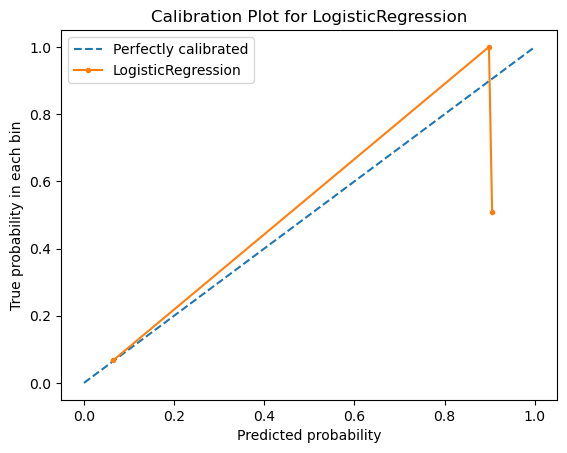

Results for RandomForestClassifier:


C:\Users\agami\anaconda3\envs\PD_env\Lib\site-packages\sklearn\calibration.py:321: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Precision: 0.6221
Recall: 0.1802
F1 Score: 0.2794
ROC AUC: 0.8548
PR AUC: 0.3955


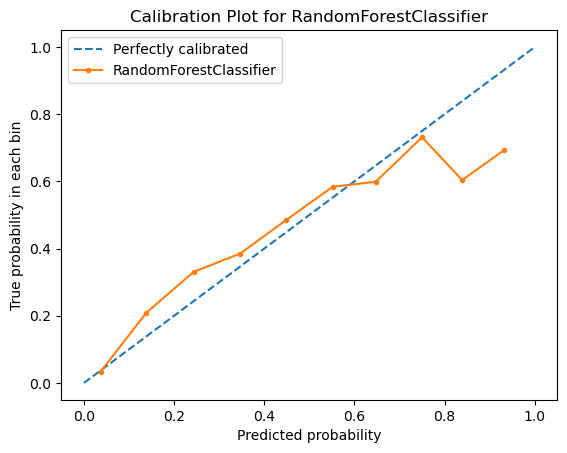

Results for XGBClassifier:


C:\Users\agami\anaconda3\envs\PD_env\Lib\site-packages\sklearn\calibration.py:321: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Precision: 0.6218
Recall: 0.2068
F1 Score: 0.3103
ROC AUC: 0.8710
PR AUC: 0.4169


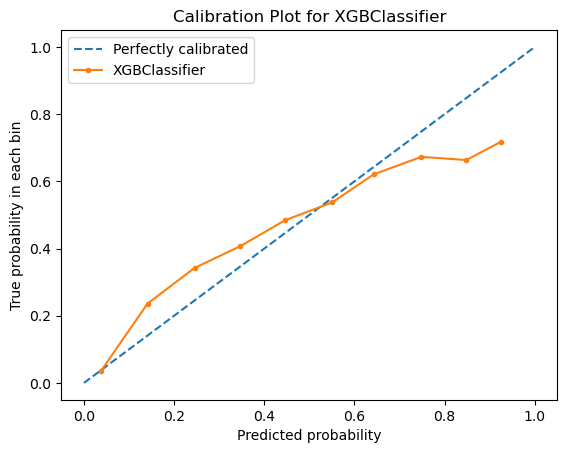

Results for LGBMClassifier:
[LightGBM] [Info] Number of positive: 11198, number of negative: 89584
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004363 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1228
[LightGBM] [Info] Number of data points in the train set: 100782, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111111 -> initscore=-2.079442
[LightGBM] [Info] Start training from score -2.079442


C:\Users\agami\anaconda3\envs\PD_env\Lib\site-packages\sklearn\calibration.py:321: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5133, number of negative: 71667
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002570 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 967
[LightGBM] [Info] Number of data points in the train set: 76800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.066836 -> initscore=-2.636340
[LightGBM] [Info] Start training from score -2.636340
[LightGBM] [Info] Number of positive: 5133, number of negative: 71667
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003655 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 967
[LightGBM] [Info] Number of data points in the train set: 76800, number of used features: 10
[LightGBM] [Info] [bin

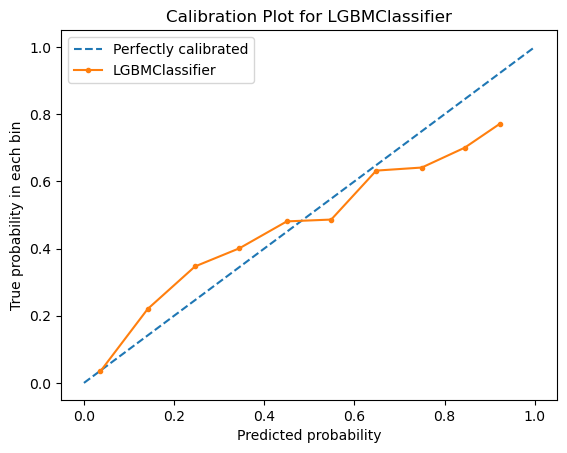

Results for GradientBoostingClassifier:


C:\Users\agami\anaconda3\envs\PD_env\Lib\site-packages\sklearn\calibration.py:321: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Precision: 0.6398
Recall: 0.2019
F1 Score: 0.3070
ROC AUC: 0.8699
PR AUC: 0.4186


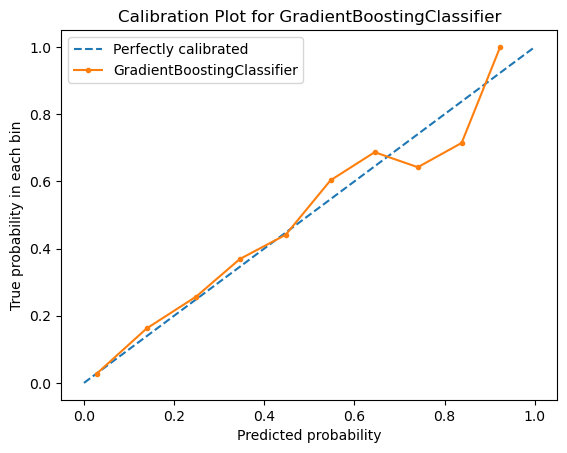

Results for CatBoostClassifier:


C:\Users\agami\anaconda3\envs\PD_env\Lib\site-packages\sklearn\calibration.py:321: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Precision: 0.6186
Recall: 0.2177
F1 Score: 0.3220
ROC AUC: 0.8714
PR AUC: 0.4202


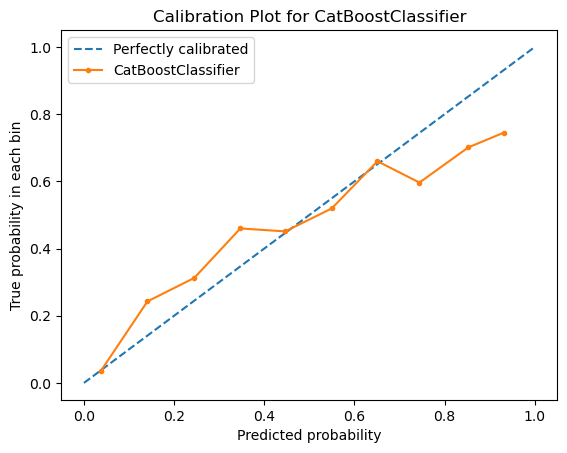

In [12]:
# Check the best initial models on entire train set

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, classification_report
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Import models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# train_df is already defined and preprocessed
X = train_df.drop('PD_2years', axis=1)
y = train_df['PD_2years']

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

models_params = {
    'LogisticRegression': (LogisticRegression(C=100.0, class_weight={0: 1, 1: 10}), 0.0),
    'RandomForestClassifier': (RandomForestClassifier(class_weight=None, n_estimators=100), 0.0),
    'XGBClassifier': (XGBClassifier(learning_rate=0.1, n_estimators=100, use_label_encoder=False, eval_metric='logloss'), 0.25),
    'LGBMClassifier': (LGBMClassifier(learning_rate=0.1, n_estimators=100), 0.125),
    'GradientBoostingClassifier': (GradientBoostingClassifier(learning_rate=0.1, n_estimators=200), 0.125),
    'CatBoostClassifier': (CatBoostClassifier(iterations=200, learning_rate=0.1, verbose=0), 0.0)
}

results = {}

# Training and evaluation loop.
for model_name, (model, smote_ratio) in models_params.items():
    print(f"Results for {model_name}:")
    if smote_ratio > 0:
        smote = SMOTE(sampling_strategy=smote_ratio, random_state=42)
        pipeline = ImbPipeline(steps=[('smote', smote),
                                      ('scaler', StandardScaler()), 
                                      ('model', model)])
    else:
        pipeline = ImbPipeline(steps=[('scaler', StandardScaler()), 
                                      ('model', model)])
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Extract the fitted model from the pipeline
    fitted_model = pipeline.named_steps['model']
    
    # Explore the reliability of each model using calibration curve
    calibrated_model = CalibratedClassifierCV(base_estimator=fitted_model, method='sigmoid', cv=5)
    calibrated_model.fit(X_train_scaled, y_train)  
    
    # Predicting probabilities and classes on the validation set
    y_probas = calibrated_model.predict_proba(X_val_scaled)[:, 1]
    y_pred = calibrated_model.predict(X_val_scaled)
    
    # Metrics
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_probas)
    pr_auc = average_precision_score(y_val, y_probas)

    # Display metrics
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"PR AUC: {pr_auc:.4f}")

    # Calibration plot
    probability_true, predicted_probability = calibration_curve(y_val, y_probas, n_bins=10)
    plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
    plt.plot(predicted_probability, probability_true, marker='.', label=model_name)
    plt.xlabel('Predicted probability')
    plt.ylabel('True probability in each bin')
    plt.title(f'Calibration Plot for {model_name}')
    plt.legend()
    plt.show()

In [13]:
# Feature engineering

def add_engineered_features_and_reorder(df, drop_original_features=False):
    # Add engineered features if the original columns exist
    if {'A30-60_Counter', 'A60-90_Counter', 'A90+_Counter'}.issubset(df.columns):
        df['Total_Late_Payments'] = df[['A30-60_Counter', 'A60-90_Counter', 'A90+_Counter']].sum(axis=1)
        # Drop the original features used for 'Total_Late_Payments'
        df.drop(['A30-60_Counter', 'A60-90_Counter', 'A90+_Counter'], axis=1, inplace=True)
    
    # Check and create interaction feature only if both columns exist
    if {'age', 'num_loans'}.issubset(df.columns):
        df['Age_NumLoans_Interaction'] = df['age'] * df['num_loans']
        # Optionally drop the original features that were used to create the interaction term
        if drop_original_features:
            df.drop(['age', 'num_loans'], axis=1, inplace=True)
    
    # Ensure 'PD_2years' is the last column if it exists in the DataFrame
    if 'PD_2years' in df.columns:
        target = df.pop('PD_2years')
        df['PD_2years'] = target
    
    return df

# Apply feature engineering to both training and test datasets
train_df = add_engineered_features_and_reorder(train_df, drop_original_features=False)
test_df = add_engineered_features_and_reorder(test_df, drop_original_features=False)

print("Training Set Info:")
print(train_df.info())
print("\nTest Set Info:")
print(test_df.info())

Training Set Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   personal_credit_%         120000 non-null  float64
 1   age                       120000 non-null  int64  
 2   expense_ratio             120000 non-null  float64
 3   income                    120000 non-null  float64
 4   num_loans                 120000 non-null  int64  
 5   num_home_loans            120000 non-null  int64  
 6   num_dependents            120000 non-null  float64
 7   Total_Late_Payments       120000 non-null  int64  
 8   Age_NumLoans_Interaction  120000 non-null  int64  
 9   PD_2years                 120000 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 9.2 MB
None

Test Set Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 10 columns):
 #   Column       

Results for LogisticRegression:


C:\Users\agami\anaconda3\envs\PD_env\Lib\site-packages\sklearn\calibration.py:321: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Precision: 0.5283
Recall: 0.0169
F1 Score: 0.0328
ROC AUC: 0.8022
PR AUC: 0.3397


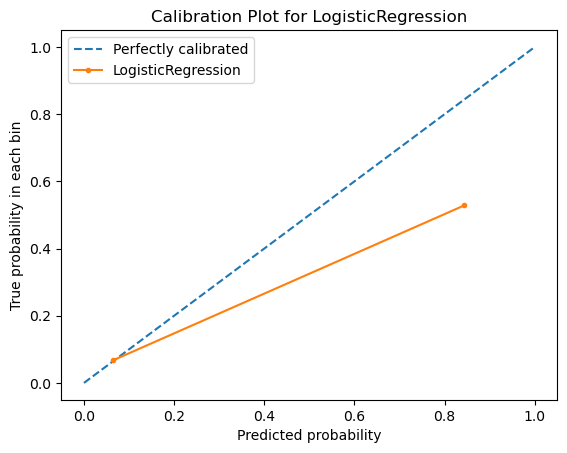

Results for RandomForestClassifier:


C:\Users\agami\anaconda3\envs\PD_env\Lib\site-packages\sklearn\calibration.py:321: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Precision: 0.5887
Recall: 0.1644
F1 Score: 0.2571
ROC AUC: 0.8493
PR AUC: 0.3778


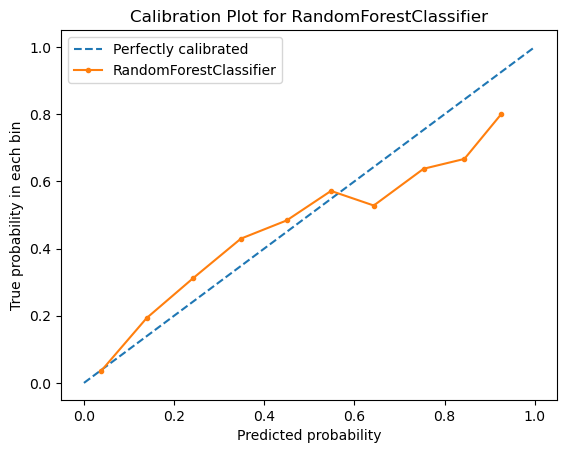

Results for XGBClassifier:


C:\Users\agami\anaconda3\envs\PD_env\Lib\site-packages\sklearn\calibration.py:321: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Precision: 0.6007
Recall: 0.1983
F1 Score: 0.2982
ROC AUC: 0.8681
PR AUC: 0.4054


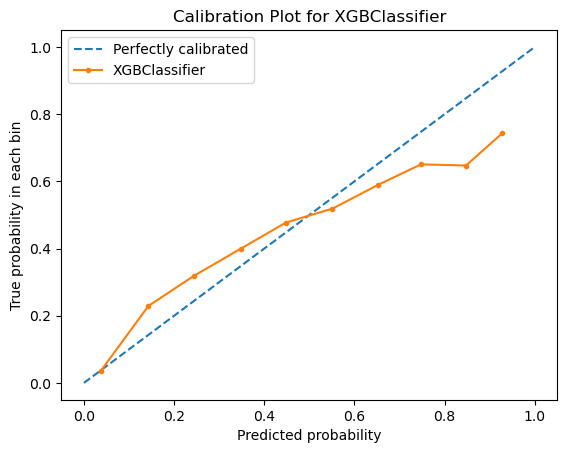

Results for LGBMClassifier:
[LightGBM] [Info] Number of positive: 11198, number of negative: 89584
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001645 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1450
[LightGBM] [Info] Number of data points in the train set: 100782, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111111 -> initscore=-2.079442
[LightGBM] [Info] Start training from score -2.079442


C:\Users\agami\anaconda3\envs\PD_env\Lib\site-packages\sklearn\calibration.py:321: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5133, number of negative: 71667
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007602 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1202
[LightGBM] [Info] Number of data points in the train set: 76800, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.066836 -> initscore=-2.636340
[LightGBM] [Info] Start training from score -2.636340
[LightGBM] [Info] Number of positive: 5133, number of negative: 71667
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006843 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1202
[LightGBM] [Info] Number of data points in the train set: 76800, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.066836 -> initscore=-2.636340
[LightGBM] [Info] Start training from score -2.636340
[LightGBM] [Info

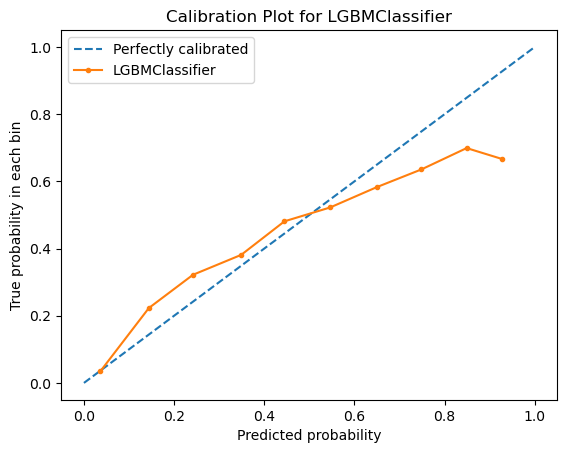

Results for GradientBoostingClassifier:


C:\Users\agami\anaconda3\envs\PD_env\Lib\site-packages\sklearn\calibration.py:321: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Precision: 0.6197
Recall: 0.1753
F1 Score: 0.2733
ROC AUC: 0.8671
PR AUC: 0.4007


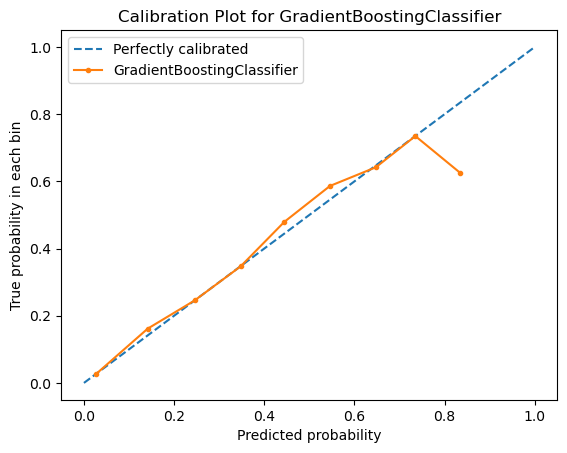

Results for CatBoostClassifier:


C:\Users\agami\anaconda3\envs\PD_env\Lib\site-packages\sklearn\calibration.py:321: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Precision: 0.5989
Recall: 0.2050
F1 Score: 0.3054
ROC AUC: 0.8685
PR AUC: 0.4038


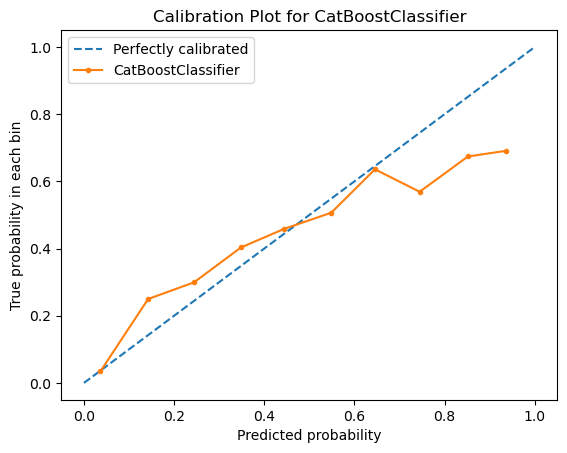

In [14]:
# Check the best models on entire feature-engineerded training set

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, classification_report
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Import models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# train_df is already defined and preprocessed
X = train_df.drop('PD_2years', axis=1)
y = train_df['PD_2years']

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

models_params = {
    'LogisticRegression': (LogisticRegression(C=100.0, class_weight={0: 1, 1: 10}), 0.0),
    'RandomForestClassifier': (RandomForestClassifier(class_weight=None, n_estimators=100), 0.0),
    'XGBClassifier': (XGBClassifier(learning_rate=0.1, n_estimators=100, use_label_encoder=False, eval_metric='logloss'), 0.25),
    'LGBMClassifier': (LGBMClassifier(learning_rate=0.1, n_estimators=100), 0.125),
    'GradientBoostingClassifier': (GradientBoostingClassifier(learning_rate=0.1, n_estimators=200), 0.125),
    'CatBoostClassifier': (CatBoostClassifier(iterations=200, learning_rate=0.1, verbose=0), 0.0)
}

results = {}

# Training and evaluation loop.
for model_name, (model, smote_ratio) in models_params.items():
    print(f"Results for {model_name}:")
    if smote_ratio > 0:
        smote = SMOTE(sampling_strategy=smote_ratio, random_state=42)
        pipeline = ImbPipeline(steps=[('smote', smote),
                                      ('scaler', StandardScaler()), 
                                      ('model', model)])
    else:
        pipeline = ImbPipeline(steps=[('scaler', StandardScaler()), 
                                      ('model', model)])
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Extract the fitted model from the pipeline
    fitted_model = pipeline.named_steps['model']
    
    # Explore the reliability of each model using calibration curve
    calibrated_model = CalibratedClassifierCV(base_estimator=fitted_model, method='sigmoid', cv=5)
    calibrated_model.fit(X_train_scaled, y_train)  # Note: Using scaled X_train for fitting here
    
    # Predicting probabilities and classes on the validation set
    y_probas = calibrated_model.predict_proba(X_val_scaled)[:, 1]
    y_pred = calibrated_model.predict(X_val_scaled)
    
    # Metrics
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_probas)
    pr_auc = average_precision_score(y_val, y_probas)

    # Display metrics
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"PR AUC: {pr_auc:.4f}")

    # Calibration plot
    probability_true, predicted_probability = calibration_curve(y_val, y_probas, n_bins=10)
    plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
    plt.plot(predicted_probability, probability_true, marker='.', label=model_name)
    plt.xlabel('Predicted probability')
    plt.ylabel('True probability in each bin')
    plt.title(f'Calibration Plot for {model_name}')
    plt.legend()
    plt.show()

In [3]:
# Original dataset selected - reimporting/imputting

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Adjust the paths according to your dataset locations
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Handling missing values

from sklearn.impute import SimpleImputer

# Impute missing values for "income" with median for both training and test sets
income_imputer = SimpleImputer(strategy='median')
train_df['income'] = income_imputer.fit_transform(train_df[['income']])
test_df['income'] = income_imputer.transform(test_df[['income']])

# Impute missing values for "num_dependents" with mode for both training and test sets
num_dependents_imputer = SimpleImputer(strategy='most_frequent')
train_df['num_dependents'] = num_dependents_imputer.fit_transform(train_df[['num_dependents']])
test_df['num_dependents'] = num_dependents_imputer.transform(test_df[['num_dependents']])

print("Training Set Info:")
print(train_df.info())
print("\nTest Set Info:")
print(test_df.info())

# Generate a Representative Smaller Training Set

from sklearn.model_selection import train_test_split

# 'PD_2years' is the target variable
X = train_df.drop('PD_2years', axis=1)
y = train_df['PD_2years']

# Generate a smaller, stratified training dataset (30% of the original)
X_small, _, y_small, _ = train_test_split(X, y, test_size=0.5, stratify=y, random_state=42)

# Combining X_small and y_small for simplicity in further steps
small_train_df = X_small.copy()
small_train_df['PD_2years'] = y_small

print("Training Set Info:")
print(small_train_df.info())
print("\nTest Set Info:")
print(test_df.info())

Training Set Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   personal_credit_%  120000 non-null  float64
 1   age                120000 non-null  int64  
 2   A30-60_Counter     120000 non-null  int64  
 3   expense_ratio      120000 non-null  float64
 4   income             120000 non-null  float64
 5   num_loans          120000 non-null  int64  
 6   A90+_Counter       120000 non-null  int64  
 7   num_home_loans     120000 non-null  int64  
 8   A60-90_Counter     120000 non-null  int64  
 9   num_dependents     120000 non-null  float64
 10  PD_2years          120000 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 10.1 MB
None

Test Set Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
--- 

In [16]:
# Finetuning the selected models around the selected hyperparameters

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score, roc_auc_score, average_precision_score
import numpy as np

# Import models
from catboost import CatBoostClassifier

# Define SMOTE ratios
smote_ratios = [0.0, 0.125, 0.25, 0.5, 0.75, 1.0]

# Assuming the smaller dataset 'small_train_df' has been created
X_small = small_train_df.drop('PD_2years', axis=1)
y_small = small_train_df['PD_2years']

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = {'F1': 'f1', 'Precision': 'precision', 'Recall': 'recall', 'ROC_AUC': 'roc_auc', 'PR_AUC': 'average_precision'}

# CatBoostClassifier hyperparameters to investigate
catboost_params = {
    'clf__iterations': [150, 200, 250],  # Close to the previously best parameter
    'clf__learning_rate': [0.05, 0.1, 0.15],  # Close to the previously best parameter
    'clf__depth': [4, 6, 8],  # Additional parameter to tune
    'clf__l2_leaf_reg': [1, 3, 5]  # Regularization term, an additional parameter for tuning
}

# Results placeholder
results = []

# Loop for CatBoostClassifier fitting and evaluation with SMOTE ratios
model_name = 'CatBoostClassifier'
model = CatBoostClassifier(verbose=0)  # Base model without specific parameters

for ratio in smote_ratios:
    if ratio > 0.0:
        pipeline = ImbPipeline([
            ('smote', SMOTE(sampling_strategy=ratio, random_state=42)),
            ('scaler', StandardScaler()),
            ('clf', model)
        ])
    else:
        pipeline = ImbPipeline([
            ('scaler', StandardScaler()),
            ('clf', model)
        ])
    
    # Define GridSearch
    grid_search = GridSearchCV(pipeline, catboost_params, cv=cv, scoring=scoring, refit='F1', n_jobs=-1, verbose=1)
    grid_search.fit(X_small, y_small)

    # Store the best parameters, best score, and model
    results.append({
        'Model': model_name,
        'SMOTE Ratio': ratio,
        'Best Parameters': grid_search.best_params_,
        'Best F1 Score': grid_search.best_score_,
        'Precision': grid_search.cv_results_['mean_test_Precision'][grid_search.best_index_],
        'Recall': grid_search.cv_results_['mean_test_Recall'][grid_search.best_index_],
        'ROC AUC': grid_search.cv_results_['mean_test_ROC_AUC'][grid_search.best_index_],
        'PR AUC': grid_search.cv_results_['mean_test_PR_AUC'][grid_search.best_index_],
    })

# Print results
for result in results:
    print(f"Model: {result['Model']}")
    print(f"SMOTE Ratio: {result['SMOTE Ratio']}")
    print("Best Parameters:", result['Best Parameters'])
    print(f"Best F1 Score: {result['Best F1 Score']:.4f}")
    print(f"Precision: {result['Precision']:.4f}, Recall: {result['Recall']:.4f}")
    print(f"ROC AUC: {result['ROC AUC']:.4f}, PR AUC: {result['PR AUC']:.4f}")
    print("-" * 60)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Model: CatBoostClassifier
SMOTE Ratio: 0.0
Best Parameters: {'clf__depth': 6, 'clf__iterations': 150, 'clf__l2_leaf_reg': 5, 'clf__learning_rate': 0.1}
Best F1 Score: 0.3010
Precision: 0.5912, Recall: 0.2022
ROC AUC: 0.8649, PR AUC: 0.3978
------------------------------------------------------------
Model: CatBoostClassifier
SMOTE Ratio: 0.125
Best Parameters: {'clf__depth': 6, 'clf__iterations': 150, 'clf__l2_leaf_reg': 3, 'clf__learning_rate': 0.05}
Best F1 Score: 0.3454
Precision: 0.5493, Recall: 0.2525
ROC AUC: 0.8591, PR AUC: 0.3898
------------------------------------------------------------
Model: CatBoostClassifi

Average F1 Score: 0.4468
Average Precision: 0.4086
Average Recall: 0.4945
Average ROC AUC: 0.8654
Average PR AUC: 0.4035
Optimal Threshold (based on F1): 0.2141


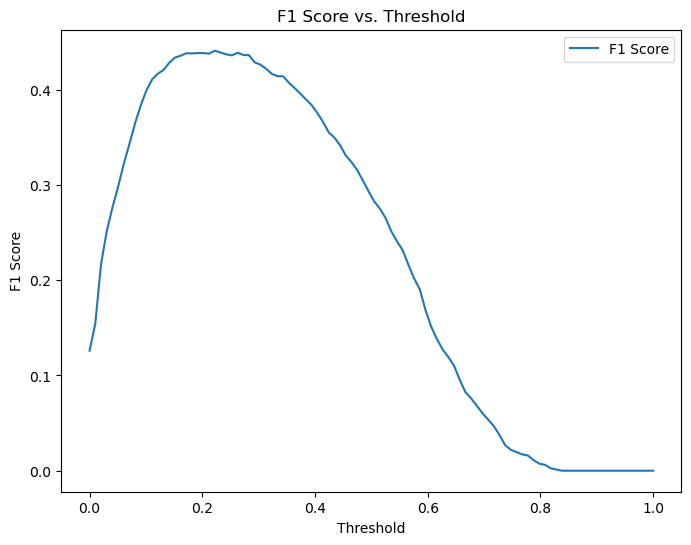

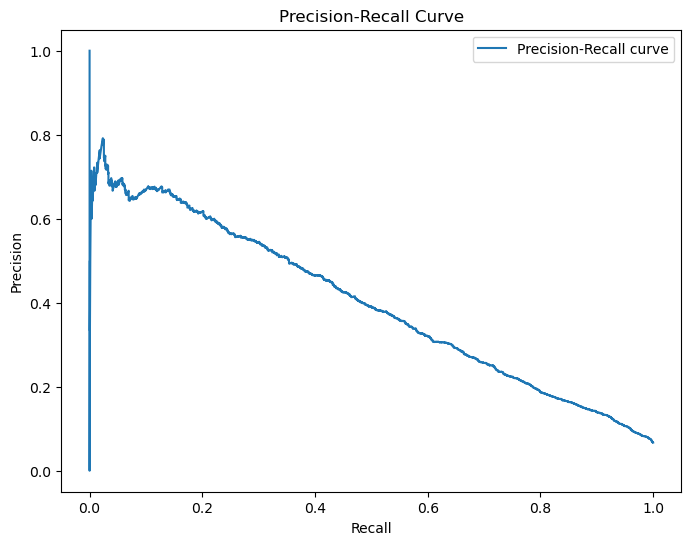

In [19]:
# Optimal threshold selection on entire training set

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, average_precision_score, precision_recall_curve
from catboost import CatBoostClassifier
import numpy as np
import matplotlib.pyplot as plt

# Assuming X and y are your features and target variable
X = train_df.drop('PD_2years', axis=1)
y = train_df['PD_2years']

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model_params = {
    'depth': 6,
    'iterations': 150,
    'l2_leaf_reg': 5,
    'learning_rate': 0.1,
    'verbose': 0
}

# Placeholder for results
results = {
    'f1_scores': [],
    'precision_scores': [],
    'recall_scores': [],
    'roc_auc_scores': [],
    'pr_auc_scores': [],
    'thresholds': []
}

# Placeholder for aggregated precision and recall
all_precision = []
all_recall = []
# Initialize a list to store F1 scores and thresholds for each fold
f1_scores_list = []
thresholds_list = []

for train_idx, test_idx in cv.split(X, y):
    X_train, X_val = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_val = y[train_idx], y[test_idx]

    # Training the model
    model = CatBoostClassifier(**model_params)
    model.fit(X_train, y_train)

    # Predicting probabilities
    y_probas = model.predict_proba(X_val)[:, 1]

    # Finding the optimal threshold
    thresholds = np.linspace(0, 1, 100)
    f1_scores = [f1_score(y_val, y_probas >= threshold) for threshold in thresholds]
    optimal_threshold = thresholds[np.argmax(f1_scores)]
    optimal_f1_score = np.max(f1_scores)

    # Predicting with the optimal threshold
    y_pred_optimal = (y_probas >= optimal_threshold).astype(int)

    # Calculating metrics
    precision = precision_score(y_val, y_pred_optimal)
    recall = recall_score(y_val, y_pred_optimal)
    roc_auc = roc_auc_score(y_val, y_probas)
    pr_auc = average_precision_score(y_val, y_probas)

    # Storing results
    results['f1_scores'].append(optimal_f1_score)
    results['precision_scores'].append(precision)
    results['recall_scores'].append(recall)
    results['roc_auc_scores'].append(roc_auc)
    results['pr_auc_scores'].append(pr_auc)
    results['thresholds'].append(optimal_threshold)
    
    f1_scores_list.append(f1_scores)
    thresholds_list.append(thresholds)
    
    # Compute precision-recall pairs for the current fold
    precision, recall, _ = precision_recall_curve(y_val, y_probas)

    # Append the average precision and recall to the list
    all_precision.append(precision)
    all_recall.append(recall)

# Calculating average metrics
avg_f1 = np.mean(results['f1_scores'])
avg_precision = np.mean(results['precision_scores'])
avg_recall = np.mean(results['recall_scores'])
avg_roc_auc = np.mean(results['roc_auc_scores'])
avg_pr_auc = np.mean(results['pr_auc_scores'])
avg_threshold = np.mean(results['thresholds'])

print(f"Average F1 Score: {avg_f1:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average ROC AUC: {avg_roc_auc:.4f}")
print(f"Average PR AUC: {avg_pr_auc:.4f}")
print(f"Optimal Threshold (based on F1): {avg_threshold:.4f}")

# Plotting F1 Scores vs. Thresholds for the last fold, for simplicity.
plt.figure(figsize=(8, 6))
plt.plot(thresholds_list[-1], f1_scores_list[-1], label='F1 Score')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Threshold')
plt.legend()
plt.show()

# Plot the average Precision-Recall curve from the last fold only, for simplicity.
plt.figure(figsize=(8, 6))
plt.plot(all_recall[-1], all_precision[-1], label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

Results for threshold = 0.2141:

             Feature  Importance
0  personal_credit_%   32.137950
2     A30-60_Counter   14.505967
6       A90+_Counter   12.195138
1                age    9.742286
8     A60-90_Counter    7.823311
5          num_loans    6.991019
3      expense_ratio    6.945824
7     num_home_loans    4.761086
4             income    3.570144
9     num_dependents    1.327274


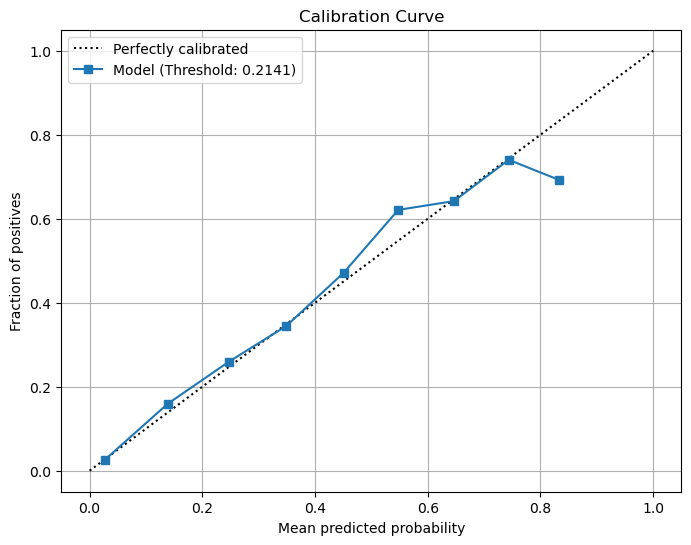


Classification report (Threshold: 0.2141):
              precision    recall  f1-score   support

           0       0.96      0.95      0.96     22346
           1       0.43      0.50      0.46      1654

    accuracy                           0.92     24000
   macro avg       0.69      0.72      0.71     24000
weighted avg       0.93      0.92      0.92     24000

ROC AUC: 0.8707
PR AUC: 0.4243
----------------------------------------------------------------------------------------------------
Results for threshold = 0.38:

             Feature  Importance
0  personal_credit_%   32.137950
2     A30-60_Counter   14.505967
6       A90+_Counter   12.195138
1                age    9.742286
8     A60-90_Counter    7.823311
5          num_loans    6.991019
3      expense_ratio    6.945824
7     num_home_loans    4.761086
4             income    3.570144
9     num_dependents    1.327274


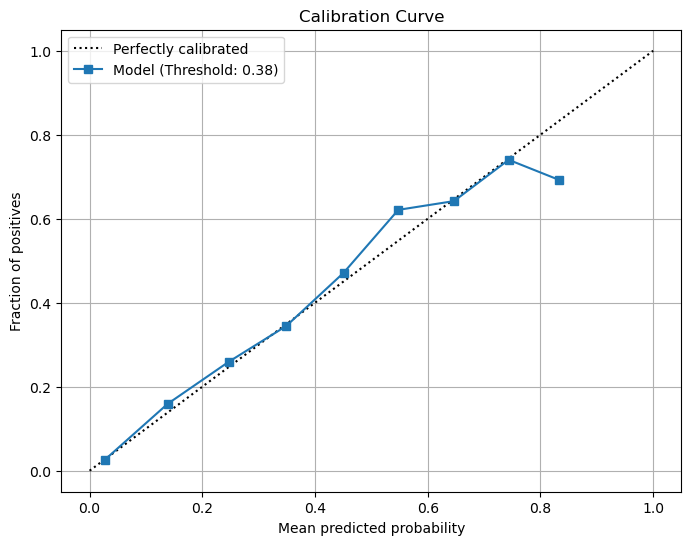


Classification report (Threshold: 0.38):
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     22346
           1       0.55      0.32      0.40      1654

    accuracy                           0.94     24000
   macro avg       0.75      0.65      0.68     24000
weighted avg       0.92      0.94      0.93     24000

ROC AUC: 0.8707
PR AUC: 0.4243
----------------------------------------------------------------------------------------------------


In [6]:
# Optimal threshold selection - part 2: checking both candidate thresholds

from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import calibration_curve
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score, precision_recall_curve
import matplotlib.pyplot as plt
import pandas as pd

# Best parameters
model_params = {
    'depth': 6,
    'iterations': 150,
    'l2_leaf_reg': 5,
    'learning_rate': 0.1,
    'verbose': 0
}

# Splitting the dataset into training and validation sets
X = train_df.drop('PD_2years', axis=1)
y = train_df['PD_2years']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Initialize the CatBoostClassifier with the best parameters
clf = CatBoostClassifier(**model_params)

# Fit the classifier on the scaled training data
clf.fit(X_train_scaled, y_train)

# Function to evaluate and plot results for a given threshold
def evaluate_and_plot(X_val_scaled, y_val, threshold):
    y_probas = clf.predict_proba(X_val_scaled)[:, 1]
    y_pred_optimal = (y_probas >= threshold).astype(int)

    # Feature importance and visualization
    feature_importances = clf.get_feature_importance()
    feature_names = X_train.columns.tolist()
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)
    print(feature_importance_df)

    # Calibration curve
    try:
        prob_true, prob_pred = calibration_curve(y_val, y_probas, n_bins=10, strategy='uniform')
    except ImportError:
        print("calibration_curve is not available in your sklearn version.")
        return

    plt.figure(figsize=(8, 6))
    plt.plot([0, 1], [0, 1], 'k:', label="Perfectly calibrated")
    plt.plot(prob_pred, prob_true, 's-', label=f"Model (Threshold: {threshold})")
    plt.xlabel('Mean predicted probability')
    plt.ylabel('Fraction of positives')
    plt.title('Calibration Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"\nClassification report (Threshold: {threshold}):")
    print(classification_report(y_val, y_pred_optimal))
    print(f"ROC AUC: {roc_auc_score(y_val, y_probas):.4f}")
    print(f"PR AUC: {average_precision_score(y_val, y_probas):.4f}")

# Evaluate and plot results for both thresholds
for threshold in [0.2141, 0.38]:
    print(f"Results for threshold = {threshold}:\n")
    evaluate_and_plot(X_val_scaled, y_val, threshold)
    print("-" * 100)


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96     28044
           1       0.40      0.50      0.44      1956

    accuracy                           0.92     30000
   macro avg       0.68      0.72      0.70     30000
weighted avg       0.93      0.92      0.92     30000

ROC AUC Score: 0.8646
PR AUC Score: 0.4020


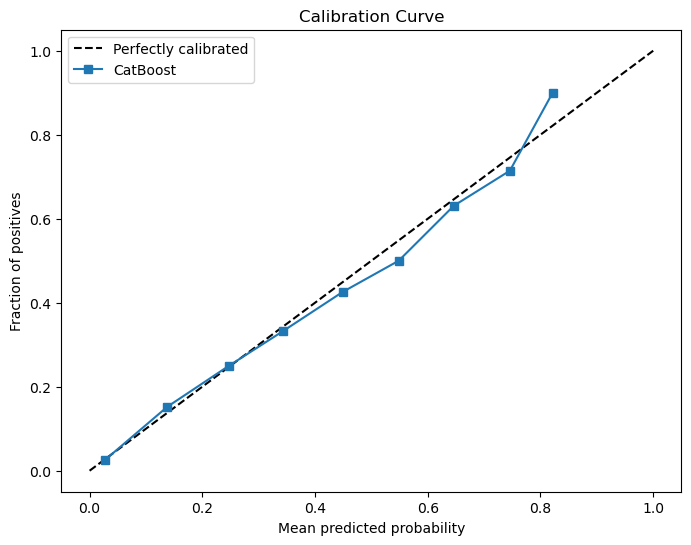

Feature Importances:
             Feature  Importance
0  personal_credit_%   31.670665
2     A30-60_Counter   14.499513
6       A90+_Counter   13.832139
1                age    8.916915
8     A60-90_Counter    7.740913
3      expense_ratio    7.307314
5          num_loans    6.659866
7     num_home_loans    4.647800
4             income    3.557743
9     num_dependents    1.167133


In [9]:
# Train and test the resulting model on entire train and test sets, together with calibration curve inspection

from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import calibration_curve
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score, precision_recall_curve
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define the best parameters for CatBoost
model_params = {
    'depth': 6,
    'iterations': 150,
    'l2_leaf_reg': 5,
    'learning_rate': 0.1,
    'verbose': 0
}

# Threshold for classification
optimal_threshold = 0.2141

# Preparing the datasets
X_train = train_df.drop('PD_2years', axis=1)
y_train = train_df['PD_2years']
X_test = test_df.drop('PD_2years', axis=1)
y_test = test_df['PD_2years']

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the CatBoostClassifier
clf = CatBoostClassifier(**model_params)
clf.fit(X_train_scaled, y_train)

# Predict probabilities on the test set
y_probas = clf.predict_proba(X_test_scaled)[:, 1]

# Apply the optimal threshold to make final predictions
y_pred_optimal = (y_probas >= optimal_threshold).astype(int)

# Display classification report and other metrics
print("Classification Report:")
print(classification_report(y_test, y_pred_optimal))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_probas):.4f}")
print(f"PR AUC Score: {average_precision_score(y_test, y_probas):.4f}")

# Plot the calibration curve
prob_true, prob_pred = calibration_curve(y_test, y_probas, n_bins=10)
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--', label="Perfectly calibrated")
plt.plot(prob_pred, prob_true, 's-', label="CatBoost")
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration Curve')
plt.legend()
plt.show()

# Store necessary data for robustness test
# Assuming robustness tests require predicted probabilities and true labels
np.save('y_test_true.npy', y_test)  # Storing true labels
np.save('y_probas_pred.npy', y_probas)  # Storing predicted probabilities

# Feature importance for future reference
feature_importances = clf.get_feature_importance()
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)
print("Feature Importances:")
print(feature_importance_df)

# Optionally, save the feature importances to a CSV file for future analysis
feature_importance_df.to_csv('catboost_feature_importances.csv', index=False)


In [10]:
# Robustness test 1: Sensitivity analysis

import pandas as pd
import numpy as np
from sklearn.metrics import f1_score

# Assuming clf is the trained CatBoost model from the previous step
# Assuming X_test_scaled is the scaled test set and y_test are the true labels

# Function to alter a feature
def alter_feature(X, column, alteration_amount, operation):
    X_altered = X.copy()
    if operation == 'add':
        X_altered[:, column] += alteration_amount
    elif operation == 'multiply':
        X_altered[:, column] *= alteration_amount
    return X_altered

# Function to perform sensitivity analysis
def sensitivity_analysis(X, y, model, feature_names):
    original_probas = model.predict_proba(X)[:, 1]
    original_pred = (original_probas >= optimal_threshold).astype(int)
    original_score = f1_score(y, original_pred)
    
    results = []

    for i, feature in enumerate(feature_names):
        feature_type = X[:, i].dtype
        alteration = 3 if np.issubdtype(feature_type, np.integer) else 0.2  # 20% for continuous
        
        # For integer features
        if np.issubdtype(feature_type, np.integer):
            X_modified = alter_feature(X, i, alteration, 'add')
            X_modified_minus = alter_feature(X, i, -alteration, 'add')
        # For continuous features
        else:
            X_modified = alter_feature(X, i, 1 + alteration, 'multiply')
            X_modified_minus = alter_feature(X, i, 1 - alteration, 'multiply')

        # Predict with altered features
        altered_probas = model.predict_proba(X_modified)[:, 1]
        altered_pred = (altered_probas >= optimal_threshold).astype(int)
        altered_score = f1_score(y, altered_pred)
        
        altered_probas_minus = model.predict_proba(X_modified_minus)[:, 1]
        altered_pred_minus = (altered_probas_minus >= optimal_threshold).astype(int)
        altered_score_minus = f1_score(y, altered_pred_minus)
        
        # Store the results
        result = {
            'Feature': feature,
            'Original F1 Score': original_score,
            'Altered F1 Score (+)': altered_score,
            'Altered F1 Score (-)': altered_score_minus,
            'Difference (+)': original_score - altered_score,
            'Difference (-)': original_score - altered_score_minus
        }
        results.append(result)
    
    return pd.DataFrame(results)

# Perform sensitivity analysis
feature_names = X_train.columns  # Column names
sensitivity_results = sensitivity_analysis(X_test_scaled, y_test, clf, feature_names)

# Display results
print(sensitivity_results)

             Feature  Original F1 Score  Altered F1 Score (+)  \
0  personal_credit_%           0.443583              0.383252   
1                age           0.443583              0.441123   
2     A30-60_Counter           0.443583              0.443334   
3      expense_ratio           0.443583              0.439618   
4             income           0.443583              0.444900   
5          num_loans           0.443583              0.443038   
6       A90+_Counter           0.443583              0.443583   
7     num_home_loans           0.443583              0.443839   
8     A60-90_Counter           0.443583              0.443583   
9     num_dependents           0.443583              0.443179   

   Altered F1 Score (-)  Difference (+)  Difference (-)  
0              0.291874        0.060331        0.151710  
1              0.445822        0.002460       -0.002239  
2              0.441379        0.000249        0.002204  
3              0.438849        0.003965        0.004

In [11]:
# Robustness test 2: Nosie addition

from sklearn.metrics import f1_score, roc_auc_score, average_precision_score
import numpy as np

def add_gaussian_noise(X, noise_level=0.01):
    """
    Adds Gaussian noise to each feature in the dataset.
    The noise is added as a percentage of the standard deviation of each feature.
    
    Parameters:
    - X: numpy array, dataset features
    - noise_level: float, percentage of the feature's standard deviation to be used as noise
    
    Returns:
    - X_noisy: numpy array, dataset features with added Gaussian noise
    """
    noise = np.random.randn(*X.shape) * noise_level * X.std(axis=0)
    X_noisy = X + noise
    return X_noisy

# Define the noise level you want to test
noise_level = 0.01  # 1% of the feature's standard deviation

# Add Gaussian noise to the test dataset
X_test_noisy = add_gaussian_noise(X_test_scaled, noise_level=noise_level)

# Predict probabilities on the noisy test set
y_probas_noisy = clf.predict_proba(X_test_noisy)[:, 1]

# Apply the optimal threshold to make final predictions
y_pred_noisy = (y_probas_noisy >= optimal_threshold).astype(int)

# Evaluate the model on the noisy test set
f1_noisy = f1_score(y_test, y_pred_noisy)
roc_auc_noisy = roc_auc_score(y_test, y_probas_noisy)
pr_auc_noisy = average_precision_score(y_test, y_probas_noisy)

# Compare performance with the original test set
original_f1 = f1_score(y_test, y_pred_optimal)  # Assuming y_pred_optimal is from the original test set evaluation
original_roc_auc = roc_auc_score(y_test, y_probas)
original_pr_auc = average_precision_score(y_test, y_probas)

# Print results
print(f"Original vs Noisy Test Set Performance:")
print(f"F1 Score: Original {original_f1:.4f} | Noisy {f1_noisy:.4f}")
print(f"ROC AUC: Original {original_roc_auc:.4f} | Noisy {roc_auc_noisy:.4f}")
print(f"PR AUC: Original {original_pr_auc:.4f} | Noisy {pr_auc_noisy:.4f}")

Original vs Noisy Test Set Performance:
F1 Score: Original 0.4436 | Noisy 0.3446
ROC AUC: Original 0.8646 | Noisy 0.7732
PR AUC: Original 0.4020 | Noisy 0.3032
